# Pure diagrams for Menthol

In [1]:
import numpy as np
from epcsaftpy import component, pcsaft
import matplotlib.pyplot as plt

**Parameters Menthol from:** <br />
M. Martins, E. Crespo, P. Pontes, L. Silva, M. Bülow, G. Maximo, E. Batista, C. Held, S. Pinho, and J. Coutinho. ACS Sustainable Chem. Eng. 6, 8836−8846 (2018). https://doi.org/10.1021/acssuschemeng.8b01203

In [2]:
Ment = component('Menthol', ms = 4.152, sigma = 3.903, eps = 262.40,
                 kappaAB = 0.0996, eAB = 1785.6 , sites = [0, 1, 1], Mw =  156.27 )
saft = pcsaft(Ment)

# VLE calculation
T0 = 250.
Tf = saft.Tc
n = 200                                                 # Number of points
Tsat_cal  = np.linspace(T0, Tf, n)                      # Temperature vector
Psat_cal  = np.zeros_like(Tsat_cal)                     # Vector to save the information
for i in range(n - 1):                   
    Psat_cal[i], _, _  = saft.psat(Tsat_cal[i])         # Solving and saving the VLE
Psat_cal[-1] = saft.Pc                                  # Saving the critical point

# Isobaric calculation
T0 = 310.
Tf = 460.
n = 50                                                  # Number of points
Tr_cal  = np.linspace(T0, Tf, n)                        # Temperature vector
rhol_cal  = np.zeros_like(Tr_cal)                       # Vector to save the information
for i in range(n):                   
    rhol_cal[i] = saft.density(Tr_cal[i], 1.013e5, "L") # Solving the density


###### Experimental information Menthol from: 
M. Martins, E. Crespo, P. Pontes, L. Silva, M. Bülow, G. Maximo, E. Batista, C. Held, S. Pinho, and J. Coutinho. ACS Sustainable Chem. Eng. 6, 8836−8846 (2018). https://doi.org/10.1021/acssuschemeng.8b01203

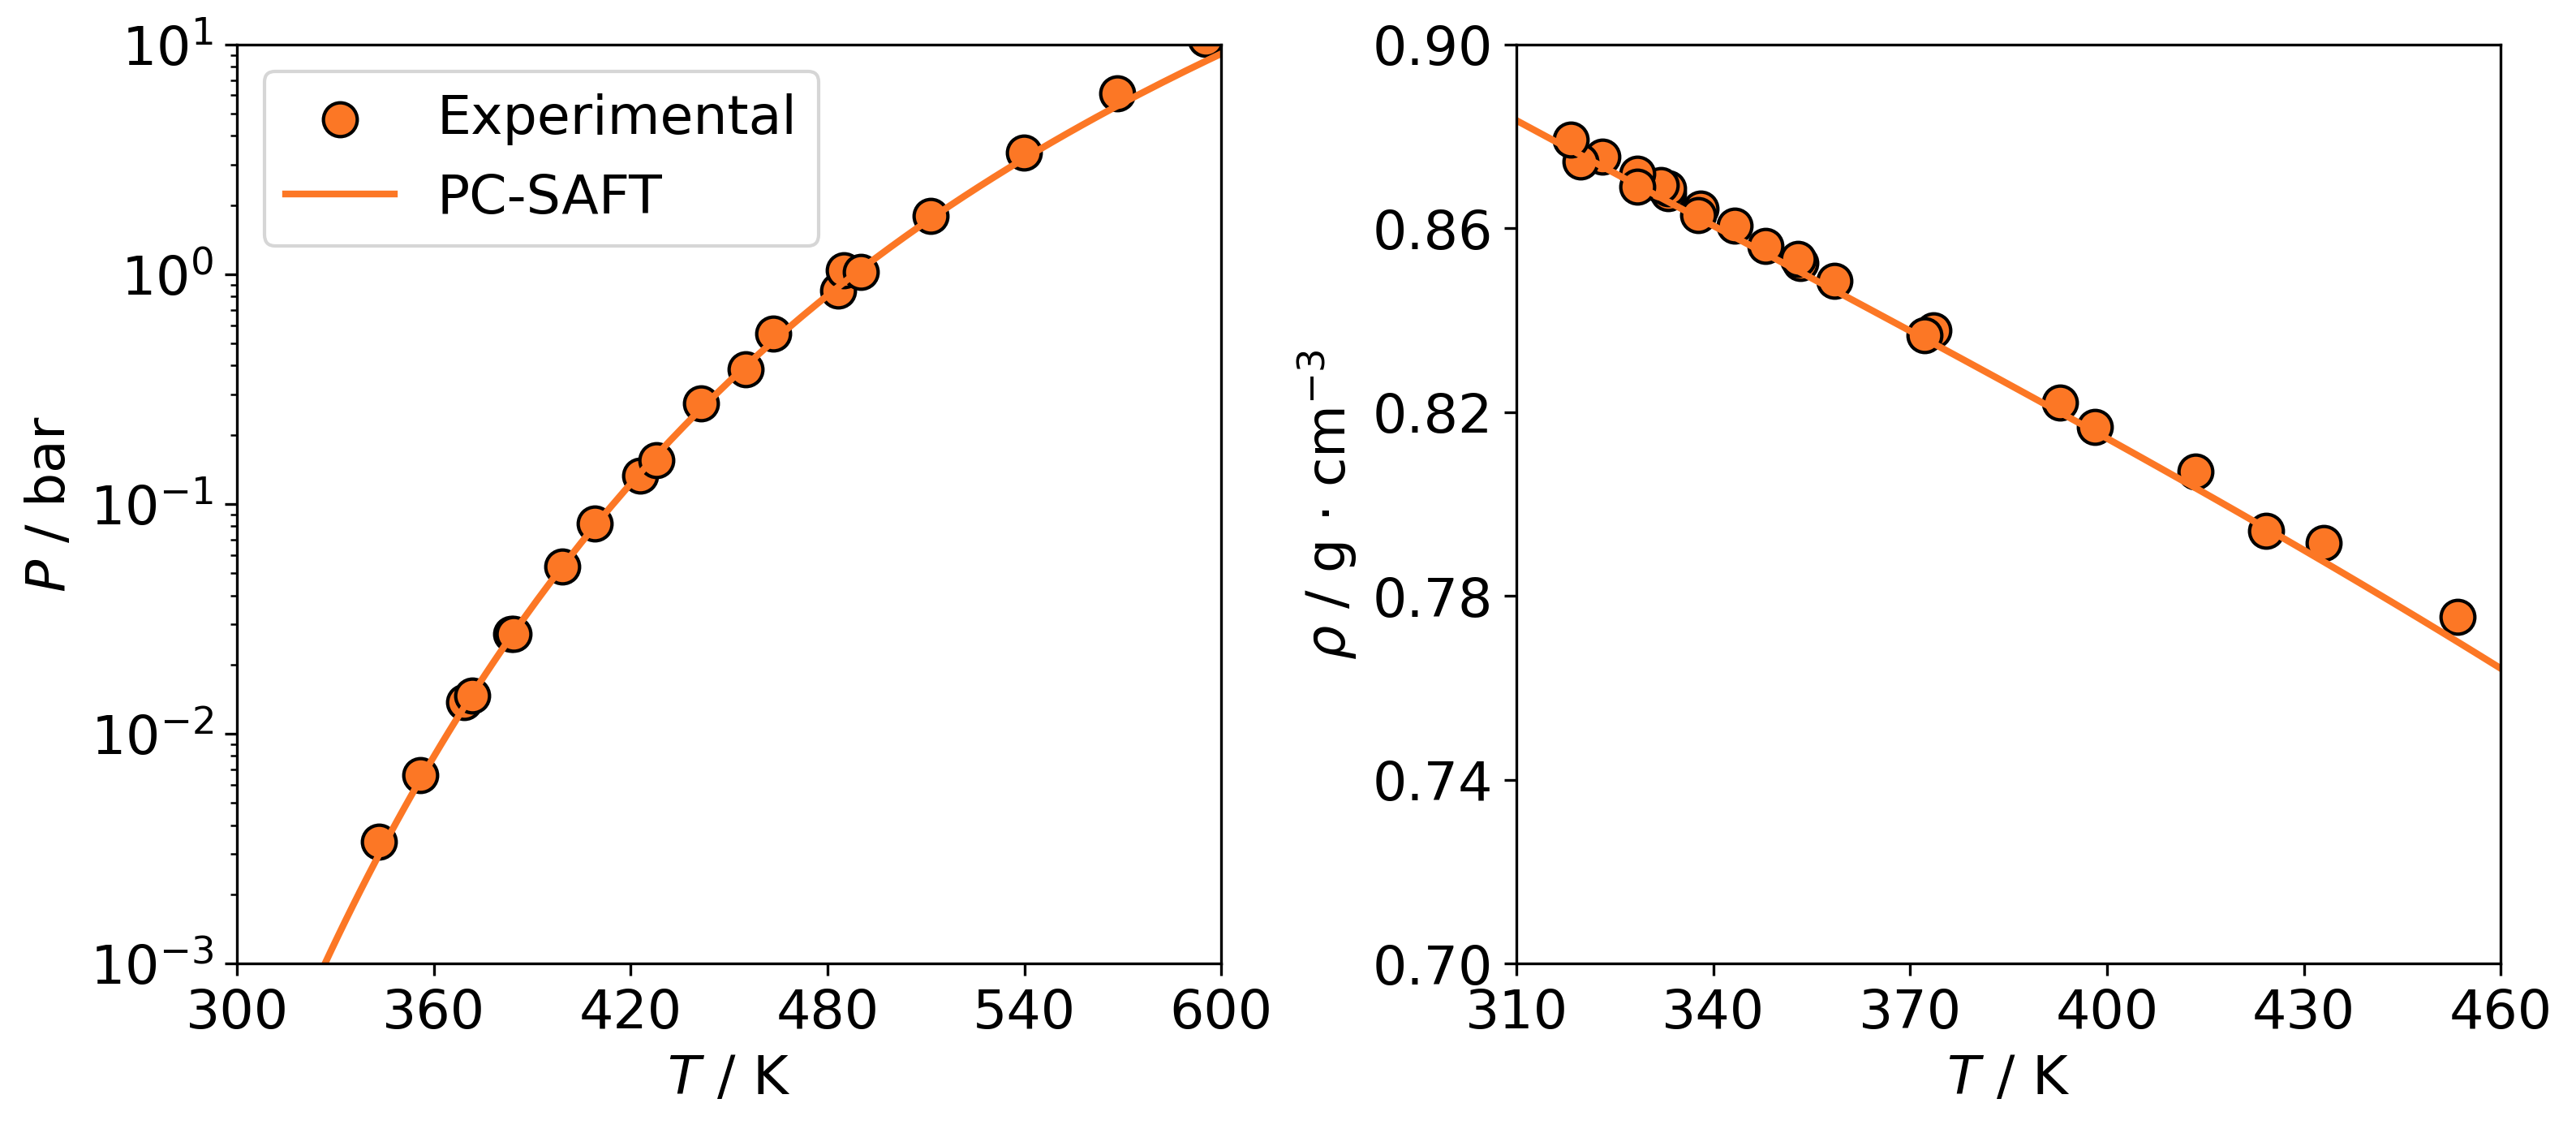

In [3]:
Tr   = np.array([453.4, 433.0, 424.2, 413.5, 398.1, 392.8,
                 373.5, 372.2, 358.4, 353.2, 352.9, 347.9,
                 343.2, 338.0, 337.7, 333.1, 333.1, 332.0,
                 328.4, 328.4, 323.1, 319.8, 318.2])              # K
rhol = np.array([775.5, 791.5, 794.2, 807.1, 816.7, 822.1,
                 837.8, 836.7, 848.6, 852.4, 853.4, 856.1,
                 860.5, 864.3, 862.9, 867.7, 868.7, 869.4,
                 871.8, 869.0, 875.5, 874.5, 879.3])              # kg/m3

Tsat = np.array([343.3, 355.9, 369.3, 371.7, 383.5, 384.2,
                 399.2, 409.0, 422.8, 427.8, 441.5, 455.1, 
                 463.5, 483.1, 484.8, 490.2, 511.5, 539.8,
                 568.2, 595.2])                                   # K
Psat = np.array([0.0034, 0.0066, 0.0137, 0.0147, 0.0271,
                 0.0271, 0.0534, 0.0822, 0.1324, 0.1551,
                 0.2734, 0.3843, 0.5522, 0.8499, 1.0420,
                 1.0190, 1.7963, 3.3898, 6.1130, 10.5340])        # bar

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
ax.scatter(Tsat, Psat, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.plot(Tsat_cal, Psat_cal * 1e-5, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel('$P$ / bar')
ax.axis([300, 600., 1e-3, 10.])

ax.set_yscale('log')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 6))
ax.legend()

ax = axs[1]
ax.scatter(Tr, rhol * 1e-3, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.plot(Tr_cal, saft.Mw * rhol_cal * 1e-6, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel(r'$\rho$ / g $\cdot$ cm$^{-3}$')
ax.axis([310, 460., 0.7, 0.9])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 6))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))


plt.show()